In [211]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as LCM
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os

# 0
Подготовка

## 0.1

Загрузка данных

In [217]:
def load_data(filename='nn_0.csv'):
    prefix = os.readlink('requisites')
    path = os.path.join(prefix, filename)
    data = pd.read_csv(path).to_numpy()
    features, labels = data[:, :-1], data[:, -1]
    labels = np.where(labels==1, 1, 0)
    return features, labels

In [218]:
X0, y0 = load_data(filename='nn_0.csv')
X1, y1 = load_data(filename='nn_1.csv')

In [219]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1)

## 0.2

Визуализация данных

In [220]:
def visualize_data(X, y, filename):
    fig = plt.figure(figsize=(9, 6))
    plt.scatter(X[:, 0], X[:, 1], c=np.where(y==1, 'red', 'blue'))
    ax = plt.gca()
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    ax.set_title(filename)
    plt.show()

In [221]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in"""

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [222]:
def color_transformed(values):
    return np.where(values>0, 'red', 'blue')

In [223]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier."""
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.where(Z>0.1, 1, 0)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [230]:
def visualize_splitting(classifier, X, y):
    # title for the plots
    titles = ('Space division')
    N = 256
    vals = np.ones((N, 4))
    vals[:, 0] = np.linspace(0, 1, N)
    vals[:, 1] = np.linspace(0, 0, N)
    vals[:, 2] = np.linspace(1, 0, N)
    newcmp = LCM(vals)
    fig = plt.figure(figsize=(9, 6))
    axes = plt.gca()
    for title, ax, X, y in zip(titles, (axes,), (X,), (y,)):
        X0, X1 = X[:, 0], X[:, 1]
        xx, yy = make_meshgrid(X0, X1)
        plot_contours(ax, classifier, xx, yy, alpha=0.8, cmap=newcmp)
        ax.scatter(X0, X1, c=color_transformed(y), s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_title(title)
    plt.show()

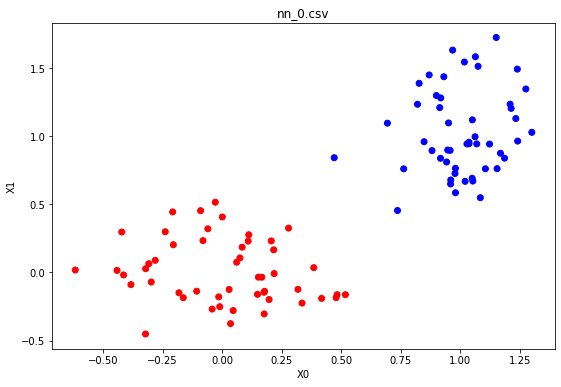

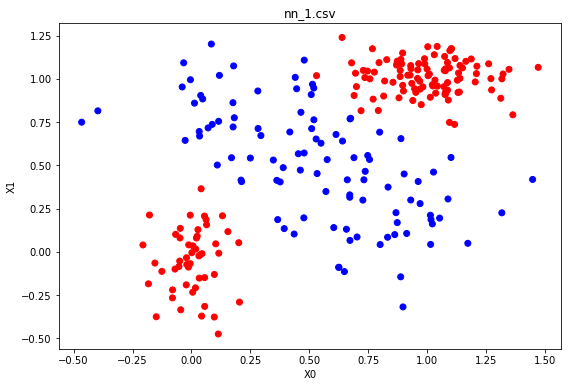

In [177]:
visualize_data(X0, y0, 'nn_0.csv')
visualize_data(X1, y1, 'nn_1.csv')

# 1

Построение нейронной сети из одного нейрона

In [225]:
def get_model(activation='relu', optimizer='sgd'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=1, input_shape=(2,)))
    model.add(tf.keras.layers.Activation(activation))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# 2

Тренировка сети на датасетах

In [231]:
model0 = get_model()

model0.evaluate(X_test0, y_test0)
model0.fit(X_train0, y_train0, epochs=50, verbose=0)
model0.evaluate(X_test0, y_test0)

25/25 [==============================] - 0s 93us/sample - loss: 0.0770 - acc: 1.0000


[0.07698703557252884, 1.0]

In [243]:
model0.fit(X_train0, y_train0, epochs=250, verbose=0)
model0.evaluate(X_test0, y_test0)

25/25 [==============================] - 0s 117us/sample - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]

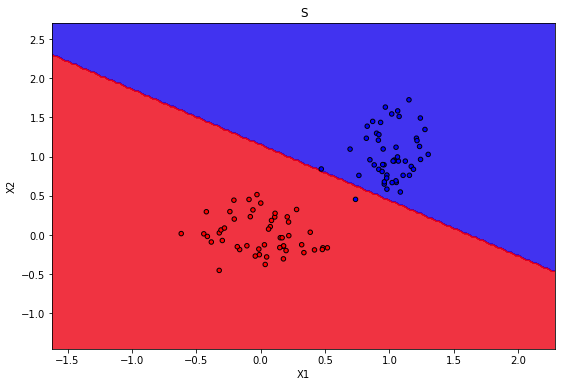

In [244]:
visualize_splitting(model0, X0, y0)

In [234]:
model1 = get_model()

model1.evaluate(X_test1, y_test1)
model1.fit(X_train1, y_train1, epochs=50, verbose=0)
model1.evaluate(X_test1, y_test1)

63/63 [==============================] - 0s 116us/sample - loss: 7.4213 - acc: 0.5079


[7.421262756226555, 0.50793654]

In [235]:
model1.fit(X_train1, y_train1, epochs=250, verbose=0)

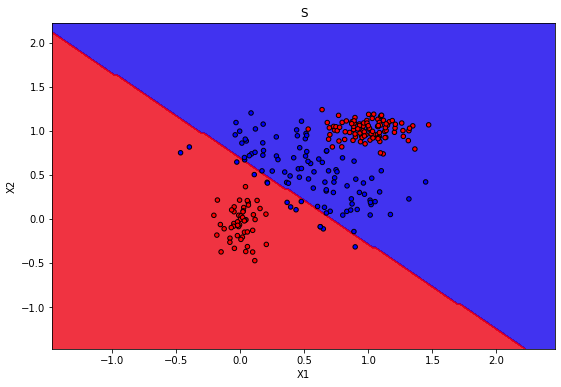

In [236]:
visualize_splitting(model1, X1, y1)

In [256]:
results0 = {}
for activation in ['relu', 'sigmoid', 'tanh']:
    for optimizer in ['adam', 'sgd', 'adadelta', 'adagrad']:
        model = get_model(activation=activation, optimizer = optimizer)

        print(f'Results with {activation} activation and {optimizer} optimizer')
        model.evaluate(X_test0, y_test0, verbose=2)
        model.fit(X_train0, y_train0, epochs=50, verbose=0)
        results0[activation+' + '+optimizer] = model.evaluate(X_test0, y_test0, verbose=2)[1]

Results with relu activation and adam optimizer
25/25 - 1s - loss: 4.8984 - acc: 0.4000
25/25 - 0s - loss: 3.8009 - acc: 0.4400
Results with relu activation and sgd optimizer
25/25 - 1s - loss: 4.7719 - acc: 0.4800
25/25 - 0s - loss: 0.0567 - acc: 1.0000
Results with relu activation and adadelta optimizer
25/25 - 1s - loss: 4.9920 - acc: 0.4800
25/25 - 0s - loss: 4.9757 - acc: 0.4800
Results with relu activation and adagrad optimizer
25/25 - 1s - loss: 4.3275 - acc: 0.5200
25/25 - 0s - loss: 4.2723 - acc: 0.5200
Results with sigmoid activation and adam optimizer
25/25 - 1s - loss: 0.9354 - acc: 0.4000
25/25 - 0s - loss: 0.8348 - acc: 0.0800
Results with sigmoid activation and sgd optimizer
25/25 - 1s - loss: 0.5728 - acc: 0.7200
25/25 - 0s - loss: 0.4929 - acc: 0.7600
Results with sigmoid activation and adadelta optimizer
25/25 - 1s - loss: 1.2077 - acc: 0.2800
25/25 - 0s - loss: 1.2075 - acc: 0.2800
Results with sigmoid activation and adagrad optimizer
25/25 - 1s - loss: 0.5652 - acc:

In [253]:
results1 = {}
for activation in ['relu', 'sigmoid', 'tanh']:
    for optimizer in ['adam', 'sgd', 'adadelta', 'adagrad']:
        model = get_model(activation=activation, optimizer = optimizer)

        print(f'Results with {activation} activation and {optimizer} optimizer')
        model.evaluate(X_test1, y_test1, verbose=2)
        model.fit(X_train1, y_train1, epochs=50, verbose=0)
        results1[activation+' + '+optimizer] = model.evaluate(X_test1, y_test1, verbose=2)[1]

Results with relu activation and adam optimizer
63/63 - 1s - loss: 1.8765 - acc: 0.8413
63/63 - 0s - loss: 1.2844 - acc: 0.7143
Results with relu activation and sgd optimizer
63/63 - 1s - loss: 6.8416 - acc: 0.3016
63/63 - 0s - loss: 0.7485 - acc: 0.5714
Results with relu activation and adadelta optimizer
63/63 - 1s - loss: 8.0943 - acc: 0.3651
63/63 - 0s - loss: 8.0942 - acc: 0.3651
Results with relu activation and adagrad optimizer
63/63 - 1s - loss: 9.4430 - acc: 0.3651
63/63 - 0s - loss: 9.2378 - acc: 0.3651
Results with sigmoid activation and adam optimizer
63/63 - 1s - loss: 0.7277 - acc: 0.3810
63/63 - 0s - loss: 0.6542 - acc: 0.7460
Results with sigmoid activation and sgd optimizer
63/63 - 1s - loss: 0.9043 - acc: 0.4286
63/63 - 0s - loss: 0.6879 - acc: 0.6667
Results with sigmoid activation and adadelta optimizer
63/63 - 1s - loss: 0.9757 - acc: 0.4762
63/63 - 0s - loss: 0.9753 - acc: 0.4762
Results with sigmoid activation and adagrad optimizer
63/63 - 1s - loss: 1.0884 - acc:

In [254]:
def plot_results(results_dict: dict, filename: str):
    fig = plt.figure(figsize=(8, 10))
    y_pos = np.arange(len(results_dict))*5.
    plot_labels, plot_x = sorted(results_dict.keys()), [results_dict[i] for i in sorted(results_dict.keys())]
    plt.barh(y_pos, plot_x, height=4.)
    plot_labels = list(map(lambda x: 'activation='+x.split('+')[0].strip()+'\noptimizer='+x.split('+')[1].strip(), plot_labels))
    plt.yticks(y_pos, plot_labels)
    ax = plt.gca()
    ax.set_xlabel('Classification accuracy after 50 epochs')
    ax.set_xlim(0., 1.1)
    ax.set_title('Accuracy results for {} dataset. More is better'.format(filename), fontsize='x-large')
    for index, value in enumerate(plot_x):
        plt.text(value+0.01, index*5.-0.5, '~'+str(value.round(4)))
    plt.show()

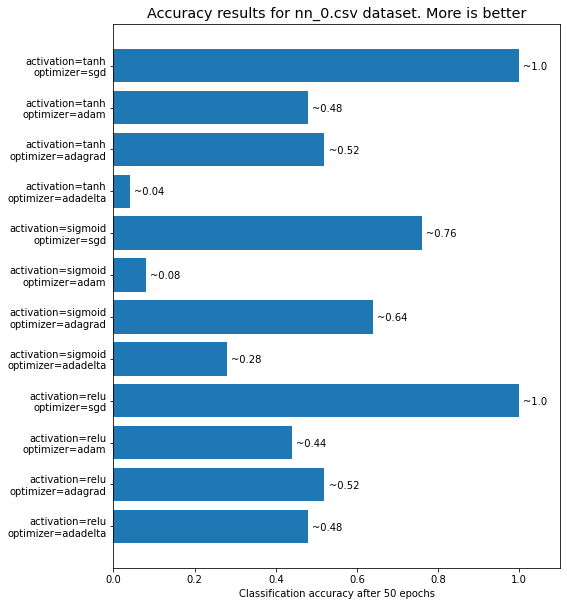

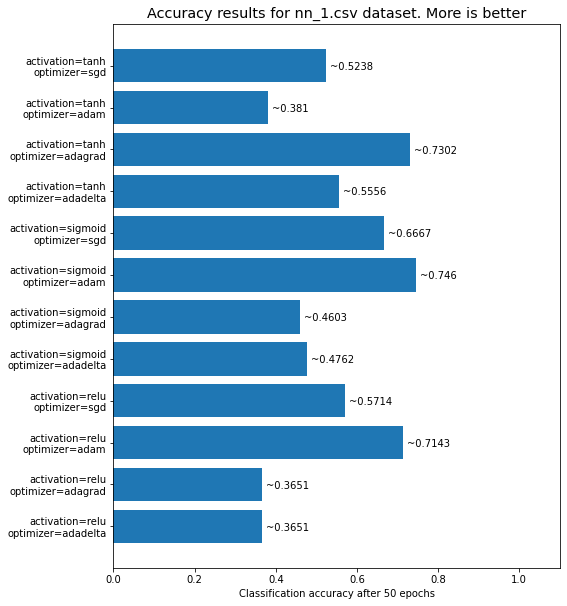

In [257]:
plot_results(results0, 'nn_0.csv')
plot_results(results1, 'nn_1.csv')

# 4

Модификации сетки для минимизации ошибки на nn_1.csv

In [258]:
optimizer = 'adam'  # tf.keras.optimizers.Adam(learning_rate=0.001)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=3, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(units=2, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [259]:
model.fit(X_train1, y_train1, epochs=1000, verbose=2)
model.evaluate(X_test1, y_test1, verbose=2)

Epoch 1/1000
187/187 - 1s - loss: 0.6778 - acc: 0.6096
Epoch 2/1000
187/187 - 0s - loss: 0.6762 - acc: 0.6310
Epoch 3/1000
187/187 - 0s - loss: 0.6744 - acc: 0.6471
Epoch 4/1000
187/187 - 0s - loss: 0.6733 - acc: 0.6738
Epoch 5/1000
187/187 - 0s - loss: 0.6719 - acc: 0.6845
Epoch 6/1000
187/187 - 0s - loss: 0.6706 - acc: 0.6845
Epoch 7/1000
187/187 - 0s - loss: 0.6697 - acc: 0.6791
Epoch 8/1000
187/187 - 0s - loss: 0.6684 - acc: 0.6791
Epoch 9/1000
187/187 - 0s - loss: 0.6676 - acc: 0.6738
Epoch 10/1000
187/187 - 0s - loss: 0.6668 - acc: 0.6684
Epoch 11/1000
187/187 - 0s - loss: 0.6658 - acc: 0.6738
Epoch 12/1000
187/187 - 0s - loss: 0.6650 - acc: 0.6738
Epoch 13/1000
187/187 - 0s - loss: 0.6643 - acc: 0.6738
Epoch 14/1000
187/187 - 0s - loss: 0.6637 - acc: 0.6684
Epoch 15/1000
187/187 - 0s - loss: 0.6629 - acc: 0.6684
Epoch 16/1000
187/187 - 0s - loss: 0.6623 - acc: 0.6684
Epoch 17/1000
187/187 - 0s - loss: 0.6616 - acc: 0.6684
Epoch 18/1000
187/187 - 0s - loss: 0.6611 - acc: 0.6684
E

Epoch 147/1000
187/187 - 0s - loss: 0.5385 - acc: 0.7433
Epoch 148/1000
187/187 - 0s - loss: 0.5365 - acc: 0.7433
Epoch 149/1000
187/187 - 0s - loss: 0.5347 - acc: 0.7433
Epoch 150/1000
187/187 - 0s - loss: 0.5327 - acc: 0.7433
Epoch 151/1000
187/187 - 0s - loss: 0.5307 - acc: 0.7433
Epoch 152/1000
187/187 - 0s - loss: 0.5287 - acc: 0.7540
Epoch 153/1000
187/187 - 0s - loss: 0.5267 - acc: 0.7540
Epoch 154/1000
187/187 - 0s - loss: 0.5249 - acc: 0.7540
Epoch 155/1000
187/187 - 0s - loss: 0.5227 - acc: 0.7540
Epoch 156/1000
187/187 - 0s - loss: 0.5205 - acc: 0.7540
Epoch 157/1000
187/187 - 0s - loss: 0.5184 - acc: 0.7540
Epoch 158/1000
187/187 - 0s - loss: 0.5163 - acc: 0.7540
Epoch 159/1000
187/187 - 0s - loss: 0.5141 - acc: 0.7540
Epoch 160/1000
187/187 - 0s - loss: 0.5121 - acc: 0.7540
Epoch 161/1000
187/187 - 0s - loss: 0.5100 - acc: 0.7540
Epoch 162/1000
187/187 - 0s - loss: 0.5078 - acc: 0.7540
Epoch 163/1000
187/187 - 0s - loss: 0.5056 - acc: 0.7540
Epoch 164/1000
187/187 - 0s - l

Epoch 291/1000
187/187 - 0s - loss: 0.2888 - acc: 0.9037
Epoch 292/1000
187/187 - 0s - loss: 0.2876 - acc: 0.9037
Epoch 293/1000
187/187 - 0s - loss: 0.2860 - acc: 0.9091
Epoch 294/1000
187/187 - 0s - loss: 0.2843 - acc: 0.9091
Epoch 295/1000
187/187 - 0s - loss: 0.2827 - acc: 0.9091
Epoch 296/1000
187/187 - 0s - loss: 0.2811 - acc: 0.9091
Epoch 297/1000
187/187 - 0s - loss: 0.2798 - acc: 0.9091
Epoch 298/1000
187/187 - 0s - loss: 0.2782 - acc: 0.9091
Epoch 299/1000
187/187 - 0s - loss: 0.2770 - acc: 0.9091
Epoch 300/1000
187/187 - 0s - loss: 0.2754 - acc: 0.9091
Epoch 301/1000
187/187 - 0s - loss: 0.2741 - acc: 0.9144
Epoch 302/1000
187/187 - 0s - loss: 0.2729 - acc: 0.9144
Epoch 303/1000
187/187 - 0s - loss: 0.2715 - acc: 0.9144
Epoch 304/1000
187/187 - 0s - loss: 0.2702 - acc: 0.9144
Epoch 305/1000
187/187 - 0s - loss: 0.2688 - acc: 0.9144
Epoch 306/1000
187/187 - 0s - loss: 0.2677 - acc: 0.9091
Epoch 307/1000
187/187 - 0s - loss: 0.2663 - acc: 0.9091
Epoch 308/1000
187/187 - 0s - l

Epoch 435/1000
187/187 - 0s - loss: 0.1434 - acc: 0.9733
Epoch 436/1000
187/187 - 0s - loss: 0.1426 - acc: 0.9733
Epoch 437/1000
187/187 - 0s - loss: 0.1419 - acc: 0.9786
Epoch 438/1000
187/187 - 0s - loss: 0.1410 - acc: 0.9786
Epoch 439/1000
187/187 - 0s - loss: 0.1411 - acc: 0.9733
Epoch 440/1000
187/187 - 0s - loss: 0.1398 - acc: 0.9733
Epoch 441/1000
187/187 - 0s - loss: 0.1391 - acc: 0.9733
Epoch 442/1000
187/187 - 0s - loss: 0.1390 - acc: 0.9733
Epoch 443/1000
187/187 - 0s - loss: 0.1378 - acc: 0.9733
Epoch 444/1000
187/187 - 0s - loss: 0.1371 - acc: 0.9733
Epoch 445/1000
187/187 - 0s - loss: 0.1365 - acc: 0.9733
Epoch 446/1000
187/187 - 0s - loss: 0.1359 - acc: 0.9733
Epoch 447/1000
187/187 - 0s - loss: 0.1352 - acc: 0.9733
Epoch 448/1000
187/187 - 0s - loss: 0.1348 - acc: 0.9786
Epoch 449/1000
187/187 - 0s - loss: 0.1341 - acc: 0.9786
Epoch 450/1000
187/187 - 0s - loss: 0.1333 - acc: 0.9786
Epoch 451/1000
187/187 - 0s - loss: 0.1328 - acc: 0.9733
Epoch 452/1000
187/187 - 0s - l

Epoch 579/1000
187/187 - 0s - loss: 0.0777 - acc: 0.9947
Epoch 580/1000
187/187 - 0s - loss: 0.0774 - acc: 0.9947
Epoch 581/1000
187/187 - 0s - loss: 0.0772 - acc: 0.9947
Epoch 582/1000
187/187 - 0s - loss: 0.0769 - acc: 0.9947
Epoch 583/1000
187/187 - 0s - loss: 0.0766 - acc: 0.9947
Epoch 584/1000
187/187 - 0s - loss: 0.0763 - acc: 0.9947
Epoch 585/1000
187/187 - 0s - loss: 0.0760 - acc: 0.9947
Epoch 586/1000
187/187 - 0s - loss: 0.0759 - acc: 0.9947
Epoch 587/1000
187/187 - 0s - loss: 0.0755 - acc: 0.9947
Epoch 588/1000
187/187 - 0s - loss: 0.0752 - acc: 0.9947
Epoch 589/1000
187/187 - 0s - loss: 0.0750 - acc: 0.9947
Epoch 590/1000
187/187 - 0s - loss: 0.0747 - acc: 0.9947
Epoch 591/1000
187/187 - 0s - loss: 0.0746 - acc: 0.9947
Epoch 592/1000
187/187 - 0s - loss: 0.0742 - acc: 0.9947
Epoch 593/1000
187/187 - 0s - loss: 0.0739 - acc: 0.9947
Epoch 594/1000
187/187 - 0s - loss: 0.0736 - acc: 0.9947
Epoch 595/1000
187/187 - 0s - loss: 0.0734 - acc: 0.9947
Epoch 596/1000
187/187 - 0s - l

Epoch 723/1000
187/187 - 0s - loss: 0.0497 - acc: 0.9947
Epoch 724/1000
187/187 - 0s - loss: 0.0495 - acc: 0.9947
Epoch 725/1000
187/187 - 0s - loss: 0.0495 - acc: 0.9947
Epoch 726/1000
187/187 - 0s - loss: 0.0493 - acc: 0.9947
Epoch 727/1000
187/187 - 0s - loss: 0.0492 - acc: 0.9947
Epoch 728/1000
187/187 - 0s - loss: 0.0491 - acc: 0.9947
Epoch 729/1000
187/187 - 0s - loss: 0.0490 - acc: 0.9947
Epoch 730/1000
187/187 - 0s - loss: 0.0488 - acc: 0.9947
Epoch 731/1000
187/187 - 0s - loss: 0.0487 - acc: 0.9947
Epoch 732/1000
187/187 - 0s - loss: 0.0488 - acc: 0.9893
Epoch 733/1000
187/187 - 0s - loss: 0.0486 - acc: 0.9947
Epoch 734/1000
187/187 - 0s - loss: 0.0483 - acc: 0.9947
Epoch 735/1000
187/187 - 0s - loss: 0.0482 - acc: 0.9947
Epoch 736/1000
187/187 - 0s - loss: 0.0481 - acc: 0.9947
Epoch 737/1000
187/187 - 0s - loss: 0.0480 - acc: 0.9947
Epoch 738/1000
187/187 - 0s - loss: 0.0478 - acc: 0.9947
Epoch 739/1000
187/187 - 0s - loss: 0.0477 - acc: 0.9947
Epoch 740/1000
187/187 - 0s - l

Epoch 867/1000
187/187 - 0s - loss: 0.0354 - acc: 0.9947
Epoch 868/1000
187/187 - 0s - loss: 0.0350 - acc: 0.9947
Epoch 869/1000
187/187 - 0s - loss: 0.0350 - acc: 0.9893
Epoch 870/1000
187/187 - 0s - loss: 0.0349 - acc: 0.9893
Epoch 871/1000
187/187 - 0s - loss: 0.0348 - acc: 0.9947
Epoch 872/1000
187/187 - 0s - loss: 0.0347 - acc: 0.9947
Epoch 873/1000
187/187 - 0s - loss: 0.0349 - acc: 0.9893
Epoch 874/1000
187/187 - 0s - loss: 0.0347 - acc: 0.9893
Epoch 875/1000
187/187 - 0s - loss: 0.0345 - acc: 0.9893
Epoch 876/1000
187/187 - 0s - loss: 0.0344 - acc: 0.9947
Epoch 877/1000
187/187 - 0s - loss: 0.0346 - acc: 0.9947
Epoch 878/1000
187/187 - 0s - loss: 0.0343 - acc: 0.9947
Epoch 879/1000
187/187 - 0s - loss: 0.0343 - acc: 0.9947
Epoch 880/1000
187/187 - 0s - loss: 0.0342 - acc: 0.9947
Epoch 881/1000
187/187 - 0s - loss: 0.0340 - acc: 0.9947
Epoch 882/1000
187/187 - 0s - loss: 0.0340 - acc: 0.9893
Epoch 883/1000
187/187 - 0s - loss: 0.0339 - acc: 0.9893
Epoch 884/1000
187/187 - 0s - l

[0.04014187294339377, 0.984127]

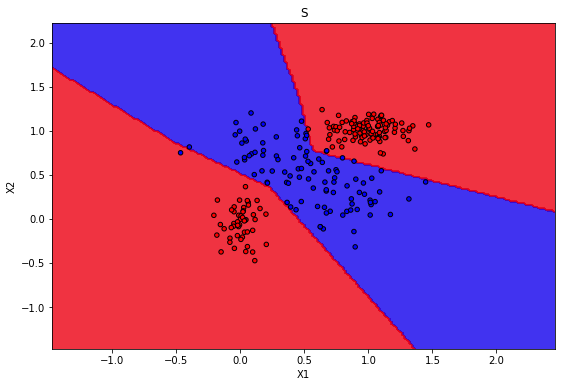

In [242]:
visualize_splitting(model, X1, y1)

In [47]:
(mnist_X_train, mnist_y_train_ph), (mnist_X_test, mnist_y_test_ph) = tf.keras.datasets.mnist.load_data()
mnist_X_train = mnist_X_train.reshape(-1, 784)
mnist_X_test = mnist_X_test.reshape(-1, 784)
mnist_y_train = np.zeros((mnist_y_train_ph.size, mnist_y_train_ph.max()+1))
mnist_y_train[np.arange(mnist_y_train_ph.size),mnist_y_train_ph] = 1
mnist_y_test = np.zeros((mnist_y_test_ph.size, mnist_y_test_ph.max()+1))
mnist_y_test[np.arange(mnist_y_test_ph.size),mnist_y_test_ph] = 1

In [48]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=128, input_shape=(784,)))
model.add(tf.keras.layers.Activation('tanh'))
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
model.fit(mnist_X_train, mnist_y_train, epochs=50, verbose=2)

Epoch 1/50
60000/60000 - 8s - loss: 0.6033 - acc: 0.8163
Epoch 2/50
60000/60000 - 8s - loss: 0.4240 - acc: 0.8712
Epoch 3/50
60000/60000 - 8s - loss: 0.4000 - acc: 0.8801
Epoch 4/50
60000/60000 - 8s - loss: 0.3696 - acc: 0.8876
Epoch 5/50
60000/60000 - 8s - loss: 0.3422 - acc: 0.8960
Epoch 6/50
60000/60000 - 8s - loss: 0.3195 - acc: 0.9021
Epoch 7/50
60000/60000 - 8s - loss: 0.3359 - acc: 0.8966
Epoch 8/50
60000/60000 - 8s - loss: 0.3305 - acc: 0.8990
Epoch 9/50
60000/60000 - 8s - loss: 0.2973 - acc: 0.9103
Epoch 10/50
60000/60000 - 10s - loss: 0.2969 - acc: 0.9107
Epoch 11/50
60000/60000 - 9s - loss: 0.2870 - acc: 0.9144
Epoch 12/50
60000/60000 - 9s - loss: 0.2945 - acc: 0.9107
Epoch 13/50
60000/60000 - 10s - loss: 0.2883 - acc: 0.9129
Epoch 14/50
60000/60000 - 10s - loss: 0.2726 - acc: 0.9182
Epoch 15/50
60000/60000 - 9s - loss: 0.2737 - acc: 0.9156
Epoch 16/50
60000/60000 - 9s - loss: 0.2570 - acc: 0.9223
Epoch 17/50
60000/60000 - 8s - loss: 0.2637 - acc: 0.9195
Epoch 18/50
60000/60

In [50]:
model.evaluate(mnist_X_test, mnist_y_test, verbose=2)

10000/10000 - 1s - loss: 0.1964 - acc: 0.9395


[0.19638022647202014, 0.9395]